# ML - Regression for 2 SiPM with 11MeV neutrons (x,y)=(0,0) (halfx,halfy)=(25,25), SiPM at (x,y)=(-25,0) and (25,0)

In [44]:
# Load libraries
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
#Metrics Class.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Metrics Regr.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Data Sets
from sklearn.datasets import fetch_california_housing

Loading dataset and printing description

In [45]:
df = pd.read_csv('neutron.csv')
print(df)

            vx        vy        vz  xpos0  ypos0  photons0  xpos1  ypos1  \
0    -22.50610 -12.05630  9.131850  -99.9  -99.9        -1  -99.9  -99.9   
1    -13.73000   2.42234  7.658350  -25.0    0.0        11   25.0    0.0   
2     21.99100   2.49198 -2.493190  -99.9  -99.9        -1   25.0    0.0   
3     10.82420 -20.50220  8.782370  -99.9  -99.9        -1  -99.9  -99.9   
4     16.26420   2.17639 -9.666160  -99.9  -99.9        -1  -99.9  -99.9   
...        ...       ...       ...    ...    ...       ...    ...    ...   
3735   7.32034  -4.90469  4.004700  -25.0    0.0        43   25.0    0.0   
3736 -14.61760  12.62300  5.914500  -25.0    0.0        39   25.0    0.0   
3737   4.35490   9.35282  0.132431  -99.9  -99.9        -1   25.0    0.0   
3738  -3.58587 -14.18500 -5.248820  -25.0    0.0        44   25.0    0.0   
3739  23.48190  10.00660 -2.008060  -99.9  -99.9        -1   25.0    0.0   

      photons1  
0           -1  
1            3  
2            1  
3           -1  
4 

In [46]:
df.head(10)

vx        vy       vz  xpos0  ypos0  photons0  xpos1  ypos1  photons1
0 -22.50610 -12.05630  9.13185  -99.9  -99.9        -1  -99.9  -99.9        -1
1 -13.73000   2.42234  7.65835  -25.0    0.0        11   25.0    0.0         3
2  21.99100   2.49198 -2.49319  -99.9  -99.9        -1   25.0    0.0         1
3  10.82420 -20.50220  8.78237  -99.9  -99.9        -1  -99.9  -99.9        -1
4  16.26420   2.17639 -9.66616  -99.9  -99.9        -1  -99.9  -99.9        -1
5  16.28990  -2.17527 -5.82825  -25.0    0.0         1  -99.9  -99.9        -1
6  17.69040  -2.20581 -3.68424  -99.9  -99.9        -1  -99.9  -99.9        -1
7 -15.42340 -10.77390 -5.71440  -99.9  -99.9        -1   25.0    0.0         1
8   7.94085 -18.04790  7.81449  -99.9  -99.9        -1  -99.9  -99.9        -1
9  11.67600 -11.97440 -5.23840  -25.0    0.0        28   25.0    0.0        41

Display the type of variables

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   vx        3740 non-null   float64
 1   vy        3740 non-null   float64
 2   vz        3740 non-null   float64
 3   xpos0     3740 non-null   float64
 4   ypos0     3740 non-null   float64
 5   photons0  3740 non-null   int64  
 6   xpos1     3740 non-null   float64
 7   ypos1     3740 non-null   float64
 8   photons1  3740 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 263.1 KB


In [48]:
#Remove unwanted rows
df = df[df['photons0'] >= 1]
df = df[df['photons1'] >= 1]

In [49]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



In [50]:
# Drop the unwanted columns
columns_drop = ["xpos0","ypos0","xpos1","ypos1"]
subset = df.drop(columns=columns_drop)
print(subset)

             vx        vy        vz  photons0  photons1
1    -13.730000   2.42234  7.658350        11         3
9     11.676000 -11.97440 -5.238400        28        41
11    -0.497508  -8.95496 -2.169570         3         5
12    -4.323370 -17.16970 -0.501205        42        37
14    24.554700  23.37990  8.106460         6        15
...         ...       ...       ...       ...       ...
3733   7.082800   9.75364 -4.772530        42        45
3734 -16.093100   4.26154  7.172990        50        18
3735   7.320340  -4.90469  4.004700        43        47
3736 -14.617600  12.62300  5.914500        39        22
3738  -3.585870 -14.18500 -5.248820        44        35

[1825 rows x 5 columns]


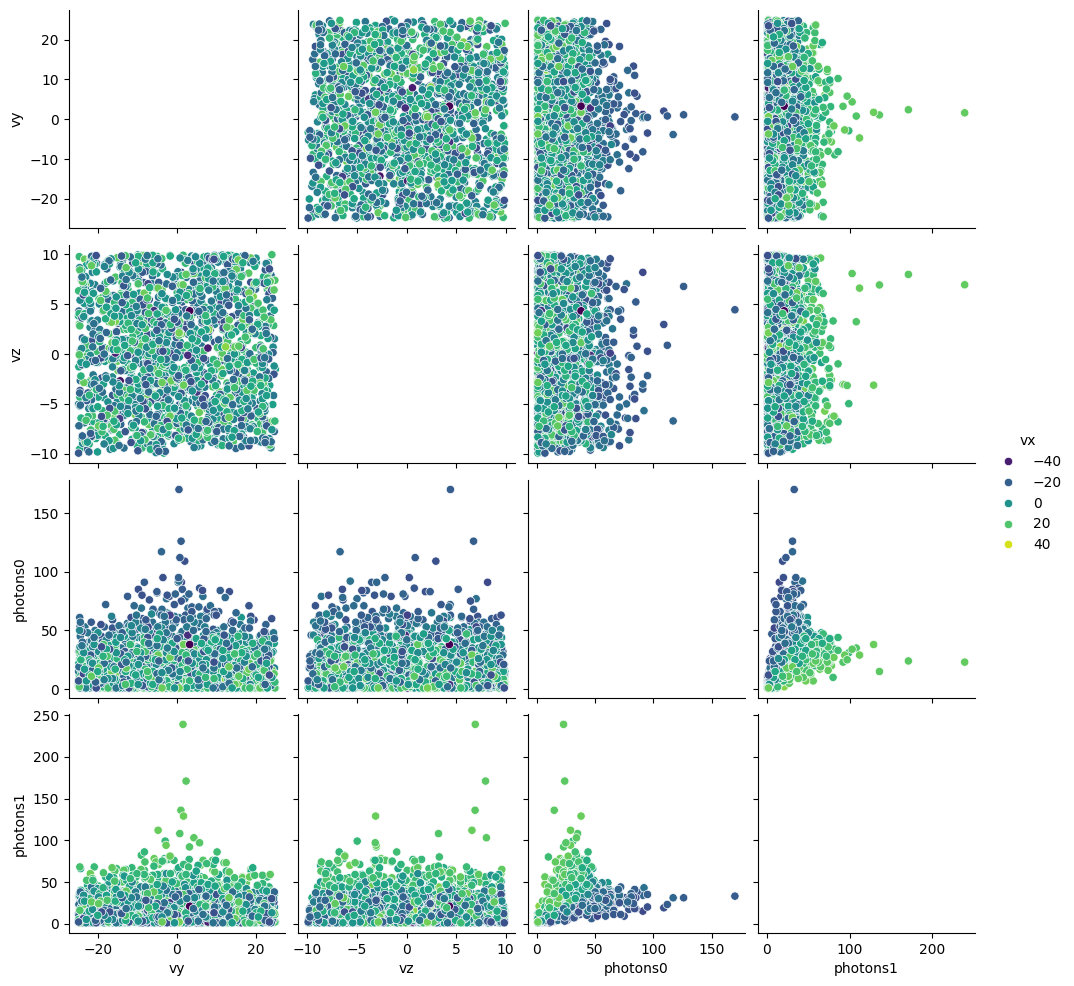

In [51]:
_ = sns.pairplot(data=subset, hue="vx", palette="viridis")

Split data set between training and testing sets

In [54]:
#Array and Data Split
array = df.values
# X corresponds to the last 2 columns (features)
X = array[:,3:5]
# y is the first column of our dataset (target)
y = array[:,0]
#Data Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN regression

In [19]:
# KNN Regression
algo = KNeighborsRegressor()
#create 10 folds
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
# Define our candidate hyperparameters
#n_neighbors = np.arange(2,10,1)
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)
# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
#scoring = 'neg_mean_squared_error'
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#print(results.mean())

The best parameters are {'n_neighbors': 8, 'weights': 'uniform'} with a score of -0.03


In [20]:
#grid.cv_results_

In [21]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["res"])],axis=1)
grid_results.head()

n_neighbors   weights       res
0            2   uniform -0.262984
1            2  distance -0.262984
2            3   uniform -0.229979
3            3  distance -0.229979
4            4   uniform -0.098773

In [22]:
grid_contour = grid_results.groupby(['n_neighbors','weights']).mean()
grid_contour

res
n_neighbors weights           
2           distance -0.262984
            uniform  -0.262984
3           distance -0.229979
            uniform  -0.229979
4           distance -0.098773
            uniform  -0.098773
5           distance -0.163768
            uniform  -0.163768
6           distance -0.191955
            uniform  -0.191955
7           distance -0.120083
            uniform  -0.120083
8           distance -0.029532
            uniform  -0.029532
9           distance -0.037276
            uniform  -0.037276

In [23]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['n_neighbors', 'weights', 'res']
grid_pivot = grid_reset.pivot(index='n_neighbors', columns='weights')
grid_pivot

res          
weights      distance   uniform
n_neighbors                    
2           -0.262984 -0.262984
3           -0.229979 -0.229979
4           -0.098773 -0.098773
5           -0.163768 -0.163768
6           -0.191955 -0.191955
7           -0.120083 -0.120083
8           -0.029532 -0.029532
9           -0.037276 -0.037276

In [24]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='weights')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='n_neighbors') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [25]:
n_neighbors_best = grid.cv_results_['param_n_neighbors'][grid.best_index_]
weights_best = grid.cv_results_['param_weights'][grid.best_index_]
model = KNeighborsRegressor(n_neighbors=n_neighbors_best, weights=weights_best)
model.fit(X_train,y_train)
res = model.predict(X_test)
#print(res)

In [26]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

233.4194656733099


In [27]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

15.278071399012045


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [28]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

12.96662667760274


In [29]:
#dataframe with results
df_test = pd.DataFrame(y_test, columns =['test'])
df_pred = pd.DataFrame(res, columns =['pred'])
df = pd.concat([df_test,df_pred],axis=1)
df['diff'] = df['test'] - df['pred']

In [30]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



In [31]:
df

test      pred       diff
0    -8.79924  5.072377 -13.871617
1    18.83290  5.072377  13.760523
2   -17.16200  5.072377 -22.234377
3    23.82080  5.072377  18.748423
4    20.94350  5.072377  15.871123
..        ...       ...        ...
360  18.44410  5.072377  13.371723
361 -17.91250  5.072377 -22.984877
362  11.28140  5.072377   6.209023
363  22.00510  5.072377  16.932723
364 -23.93020  5.072377 -29.002577

[365 rows x 3 columns]

# Random Forrest

In [55]:
# Random Forrest
algo = RandomForestRegressor()
#create folds
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
# Define our candidate hyperparameters
max_features_range = np.arange(1,5,1)
n_estimators_range = np.arange(100,200,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=4, n_jobs=2)
grid.fit(X_train, y_train)
# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END .max_features=1, n_estimators=100;, score=-0.003 total time=   0.2s
[CV 2/3] END .max_features=1, n_estimators=100;, score=-0.010 total time=   0.2s
[CV 3/3] END .max_features=1, n_estimators=100;, score=-0.003 total time=   0.2s
[CV 1/3] END .max_features=1, n_estimators=110;, score=-0.003 total time=   0.2s
[CV 2/3] END .max_features=1, n_estimators=110;, score=-0.011 total time=   0.2s
[CV 1/3] END .max_features=1, n_estimators=120;, score=-0.003 total time=   0.2s
[CV 3/3] END .max_features=1, n_estimators=110;, score=-0.002 total time=   0.2s
[CV 2/3] END .max_features=1, n_estimators=120;, score=-0.010 total time=   0.2s
[CV 3/3] END .max_features=1, n_estimators=120;, score=-0.002 total time=   0.2s
[CV 2/3] END .max_features=1, n_estimators=130;, score=-0.011 total time=   0.2s
[CV 1/3] END .max_features=1, n_estimators=130;, score=-0.003 total time=   0.2s
[CV 3/3] END .max_features=1, n_estimators=130;

In [56]:
#grid.cv_results_

In [57]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["r2"])],axis=1)
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot(index='max_features', columns='n_estimators')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [58]:
n_estimators_best = grid.cv_results_['param_n_estimators'][grid.best_index_]
max_features_best = grid.cv_results_['param_max_features'][grid.best_index_]
model = RandomForestRegressor(max_features=max_features_best, n_estimators=n_estimators_best)
model.fit(X_train,y_train)
res = model.predict(X_test)

In [59]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

235.61970677584415


In [60]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

15.34990901523016


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [61]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

13.317082550793696


In [62]:
#dataframe with results
df_test = pd.DataFrame(y_test, columns =['test'])
df_pred = pd.DataFrame(res, columns =['pred'])
df = pd.concat([df_test,df_pred],axis=1)
df['diff'] = df['test'] - df['pred']

In [63]:
#plt.figure(); 
#df.plot(x='test',y='pred',style='o'); 
#plt.legend(loc='best');

In [64]:
#plt.figure(); 
#df['diff'].plot.hist(bins=50); 

In [65]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



In [43]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
column_headers = list(california_housing.data.columns.values)
plt.yticks(pos, np.array(column_headers)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(column_headers)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

NameError: name 'california_housing' is not defined

# Gradient Boosting

In [40]:
# Gradient Boosting
algo = GradientBoostingRegressor()
#create 5 folds
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
# Define our candidate hyperparameters
max_features_range = np.arange(4,7,1)
n_estimators_range = np.arange(150,250,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=4, n_jobs=2)
grid.fit(X_train, y_train)
# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[CV 1/5] END ..max_features=4, n_estimators=150;, score=0.812 total time=   4.1s
[CV 2/5] END ..max_features=4, n_estimators=150;, score=0.806 total time=   4.5s
[CV 3/5] END ..max_features=4, n_estimators=150;, score=0.802 total time=   4.2s
[CV 4/5] END ..max_features=4, n_estimators=150;, score=0.782 total time=   3.9s
[CV 5/5] END ..max_features=4, n_estimators=150;, score=0.791 total time=   3.6s
[CV 1/5] END ..max_features=4, n_estimators=160;, score=0.815 total time=   3.9s
[CV 2/5] END ..max_features=4, n_estimators=160;, score=0.808 total time=   4.3s
[CV 3/5] END ..max_features=4, n_estimators=160;, score=0.801 total time=   4.0s
[CV 4/5] END ..max_features=4, n_estimators=160;, score=0.783 total time=   4.5s
[CV 5/5] END ..max_features=4, n_estimators=160;, score=0.787 total time=   4.8s
[CV 1/5] END ..max_features=4, n_estimators=170;, score=0.815 total time=   3.9s
[CV 2/5] END ..max_features=4, n_estimators=170;, score=0.811 total time=   4.3s
[CV 3/5] END ..max_features=

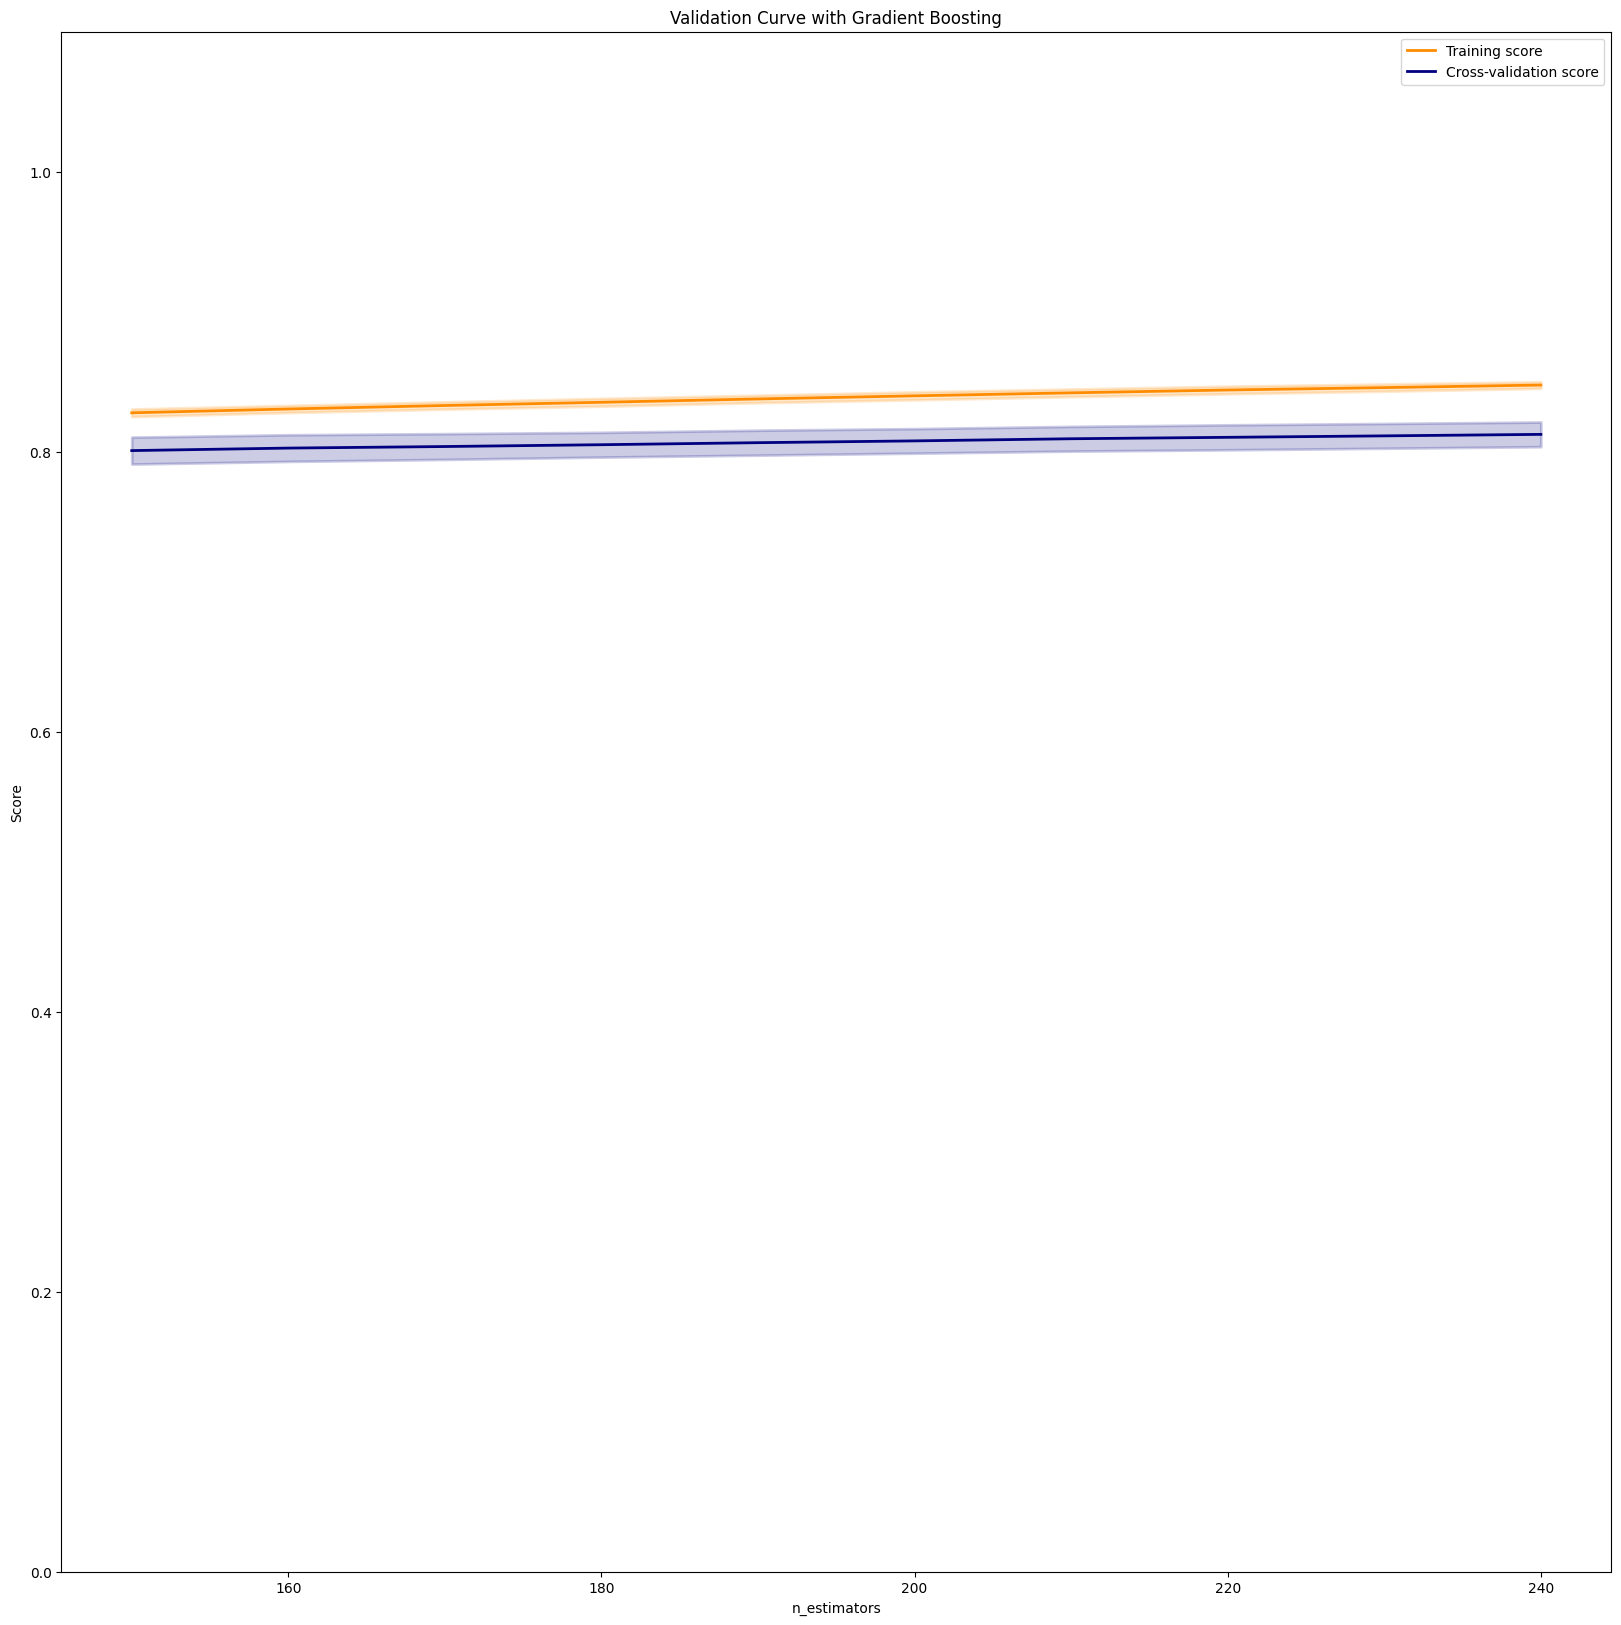

In [41]:
#validation curve for single parameter
param_range = np.arange(150,250,10)
train_scores, valid_scores = validation_curve(
    algo,
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    scoring="r2",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range, valid_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    valid_scores_mean - valid_scores_std,
    valid_scores_mean + valid_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [42]:
#grid.cv_results_

In [43]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["r2"])],axis=1)
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot(index='max_features', columns='n_estimators')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [44]:
n_estimators_best = grid.cv_results_['param_n_estimators'][grid.best_index_]
max_features_best = grid.cv_results_['param_max_features'][grid.best_index_]
model = GradientBoostingRegressor(max_features=max_features_best, n_estimators=n_estimators_best)
model.fit(X_train,y_train)
res = model.predict(X_test)

In [45]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

0.2440325305009121


In [46]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

0.4939964883487656


In [47]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

0.3413606228443068


In [48]:
#dataframe with results
df_test = pd.DataFrame(y_test, columns =['test'])
df_pred = pd.DataFrame(res, columns =['pred'])
df = pd.concat([df_test,df_pred],axis=1)
df['diff'] = df['test'] - df['pred']

In [49]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

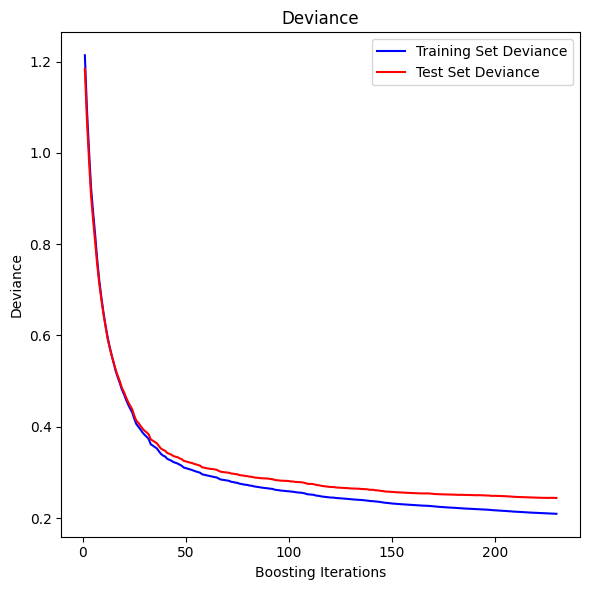

In [50]:
test_score = np.zeros((n_estimators_best,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(n_estimators_best) + 1,
    model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(n_estimators_best) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

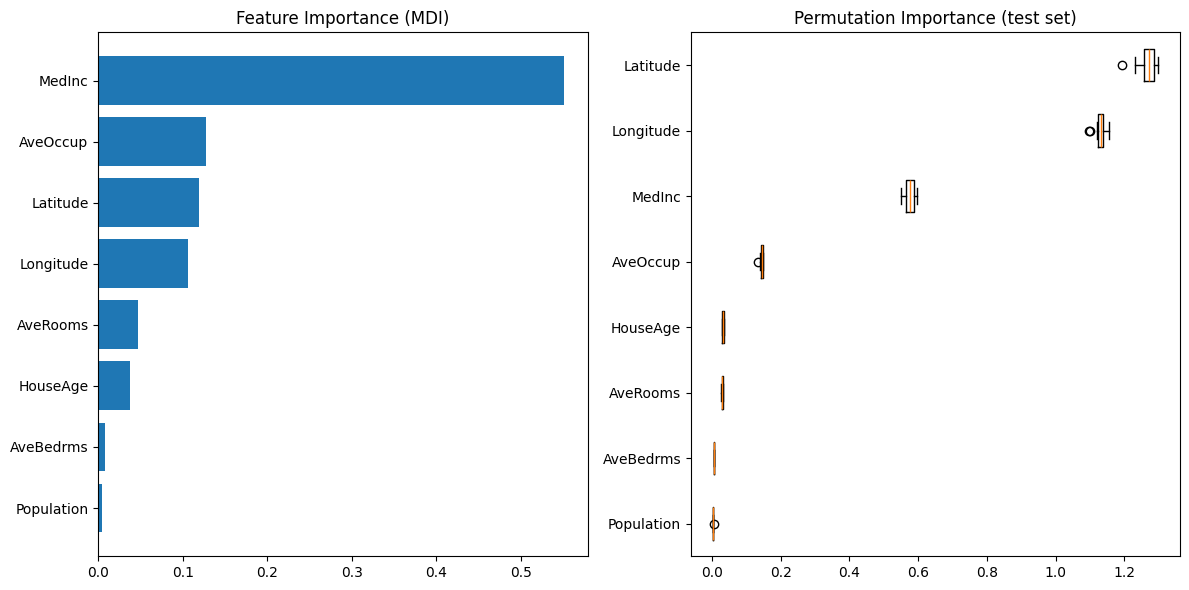

In [51]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
column_headers = list(california_housing.data.columns.values)
plt.yticks(pos, np.array(column_headers)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(column_headers)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Adaboost

In [66]:
# Adaboost
algo = AdaBoostRegressor(estimator=DecisionTreeRegressor())

# create 5 folds
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

# Define our candidate hyperparameters
param_grid = {'estimator__max_depth':[i for i in range(2,11,2)],
              #'estimator__min_samples_leaf':[5,10],
              'n_estimators':np.arange(10,210,10)}

# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=2, n_jobs=2)
grid.fit(X_train, y_train)

# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ............estimator__max_depth=2, n_estimators=10; total time=   0.4s
[CV] END ............estimator__max_depth=2, n_estimators=10; total time=   0.3s
[CV] END ............estimator__max_depth=2, n_estimators=10; total time=   0.3s
[CV] END ............estimator__max_depth=2, n_estimators=10; total time=   0.3s
[CV] END ............estimator__max_depth=2, n_estimators=10; total time=   0.3s
[CV] END ............estimator__max_depth=2, n_estimators=20; total time=   0.6s
[CV] END ............estimator__max_depth=2, n_estimators=20; total time=   0.5s
[CV] END ............estimator__max_depth=2, n_estimators=20; total time=   0.7s
[CV] END ............estimator__max_depth=2, n_estimators=20; total time=   0.7s
[CV] END ............estimator__max_depth=2, n_estimators=20; total time=   0.5s
[CV] END ............estimator__max_depth=2, n_estimators=30; total time=   0.6s
[CV] END ............estimator__max_depth=2, n

In [67]:
#grid.cv_results_

In [68]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["r2"])],axis=1)
grid_contour = grid_results.groupby(['estimator__max_depth','n_estimators']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['estimator__max_depth', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot(index='estimator__max_depth', columns='n_estimators')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='estimator__max_depth') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [71]:
n_estimators_best = grid.cv_results_['param_n_estimators'][grid.best_index_]
estimator_max_depth_best = grid.cv_results_['param_estimator__max_depth'][grid.best_index_]
model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=estimator_max_depth_best), n_estimators=n_estimators_best)
model.fit(X_train,y_train)
res = model.predict(X_test)

In [72]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

0.2577943151153863


In [73]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

0.5077344927374802


In [74]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

0.3746702075381351


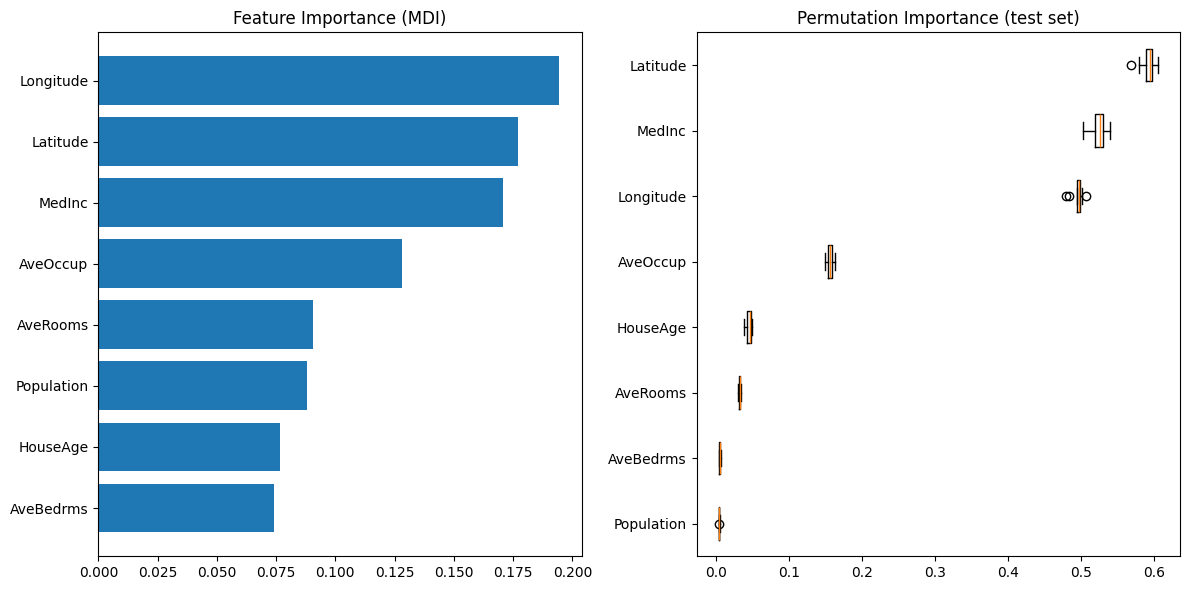

In [75]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
column_headers = list(california_housing.data.columns.values)
plt.yticks(pos, np.array(column_headers)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(column_headers)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [76]:
#dataframe with results
df_test = pd.DataFrame(y_test, columns =['test'])
df_pred = pd.DataFrame(res, columns =['pred'])
df = pd.concat([df_test,df_pred],axis=1)
df['diff'] = df['test'] - df['pred']

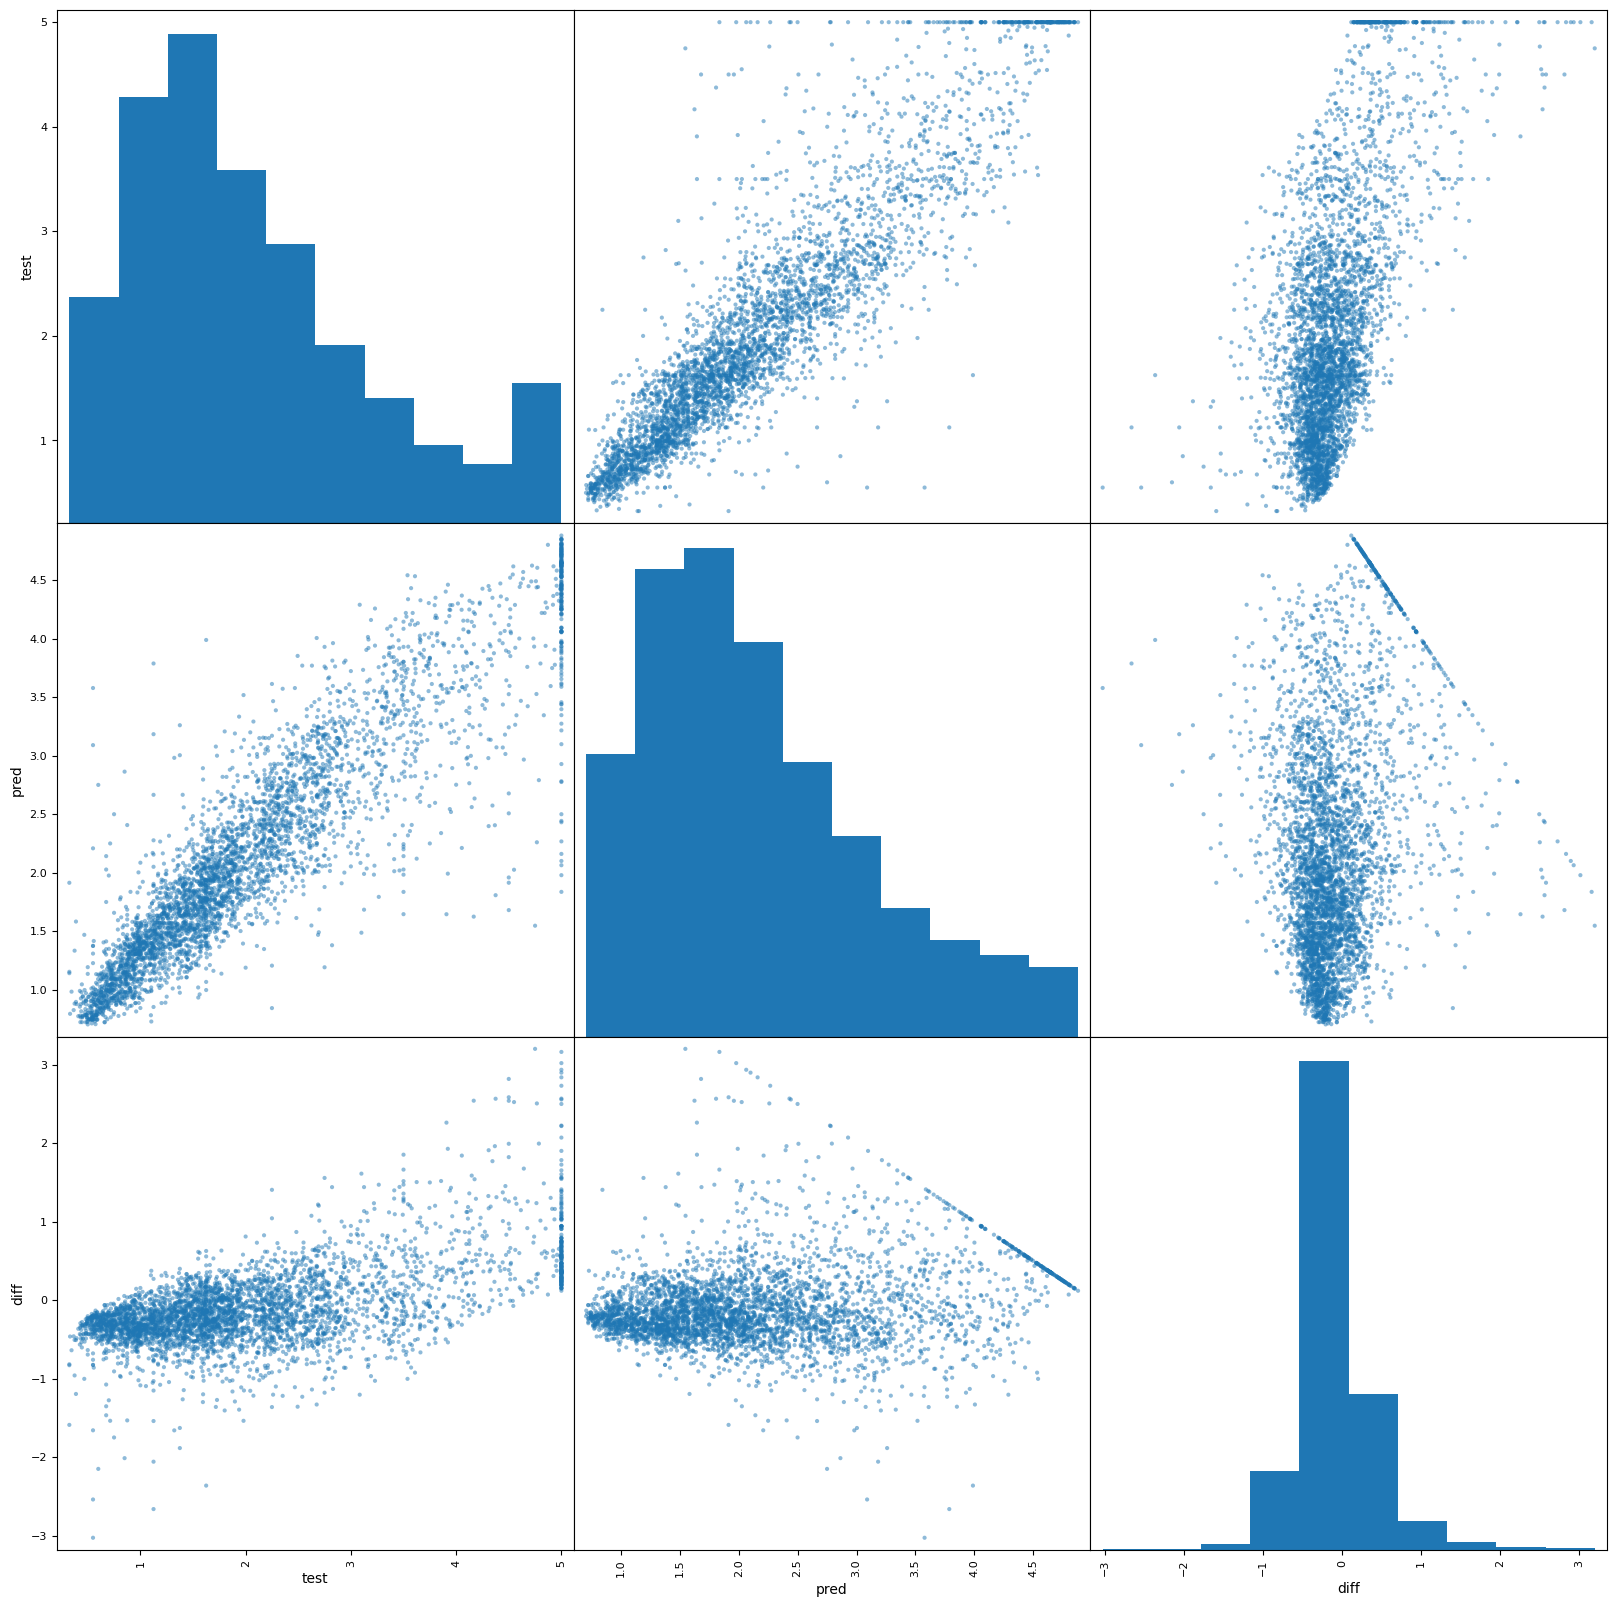

In [77]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()